In [1]:
#Packages 
import numpy as np
import cartopy
import glob
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import warnings
import xarray as xr
warnings.filterwarnings("ignore") #turns off annoying warnings
#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])
from matplotlib import ticker
crs = ccrs.PlateCarree()
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

rpath = '/global/u2/d/dylan617/repos/notebooks/txla_roms/natural_earth/ne_10m_rivers_north_america.shp'
rivers = ShapelyFeature(Reader(rpath).geometries(),
                        ccrs.PlateCarree(), facecolor='none', edgecolor = 'blue')

### Open output 

In [2]:
path = '/pscratch/sd/b/bundzis/Beaufort_ROMS_2020_test_sed_scratch/ocean_avg_00001.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset> Size: 7GB
Dimensions:         (tracer: 10, boundary: 4, NST: 5, s_rho: 20, s_w: 21,
                     eta_rho: 206, xi_rho: 608, eta_u: 206, xi_u: 607,
                     eta_v: 205, xi_v: 608, eta_psi: 205, xi_psi: 607,
                     ocean_time: 16)
Coordinates:
  * s_rho           (s_rho) float64 160B -0.975 -0.925 -0.875 ... -0.075 -0.025
  * s_w             (s_w) float64 168B -1.0 -0.95 -0.9 -0.85 ... -0.1 -0.05 0.0
    lon_rho         (eta_rho, xi_rho) float64 1MB ...
    lat_rho         (eta_rho, xi_rho) float64 1MB ...
    lon_u           (eta_u, xi_u) float64 1MB ...
    lat_u           (eta_u, xi_u) float64 1MB ...
    lon_v           (eta_v, xi_v) float64 997kB ...
    lat_v           (eta_v, xi_v) float64 997kB ...
    lon_psi         (eta_psi, xi_psi) float64 995kB ...
    lat_psi         (eta_psi, xi_psi) float64 995kB ...
  * ocean_time      (ocean_time) datetime64[ns] 128B 2020-07-01T01:00:30 ... ...
Dimensions without coordinates: tracer, boundary, NST, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/121)
    ntimes          int32 4B ...
    ndtfast         int32 4B ...
    dt              float64 8B ...
    dtfast          float64 8B ...
    dstart          datetime64[ns] 8B ...
    nHIS            int32 4B ...
    ...              ...
    Ubot            (ocean_time, eta_rho, xi_rho) float64 16MB ...
    Vbot            (ocean_time, eta_rho, xi_rho) float64 16MB ...
    Ur              (ocean_time, eta_rho, xi_rho) float64 16MB ...
    Vr              (ocean_time, eta_rho, xi_rho) float64 16MB ...
    Dwave           (ocean_time, eta_rho, xi_rho) float64 16MB ...
    Pwave_bot       (ocean_time, eta_rho, xi_rho) float64 16MB ...
Attributes: (12/52)
    file:              /pscratch/sd/b/bundzis/Beaufort_ROMS_2020_test_sed_scr...
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS nonlinear model averages file
    title:             One-dimension (vertical) Sediment Toy
    var_info:          /global/homes/b/bundzis/Repos/COAWST/ROMS/External/var...
    ...                ...
    compiler_command:  /opt/cray/pe/mpich/8.1.30/ofi/gnu/12.3/bin/mpif90
    compiler_flags:    -frepack-arrays -fallow-argument-mismatch -fallow-argu...
    tiling:            016x008
    history:           ROMS/TOMS, Version 4.1, Wednesday - June 25, 2025 - 10...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_st...
    CPP_options:       BEAUFORT_2020_TEST_SED, ANA_BPFLUX, ANA_BSFLUX, ANA_BT...

### Plot salinity as an example with all cartopy features turned on 

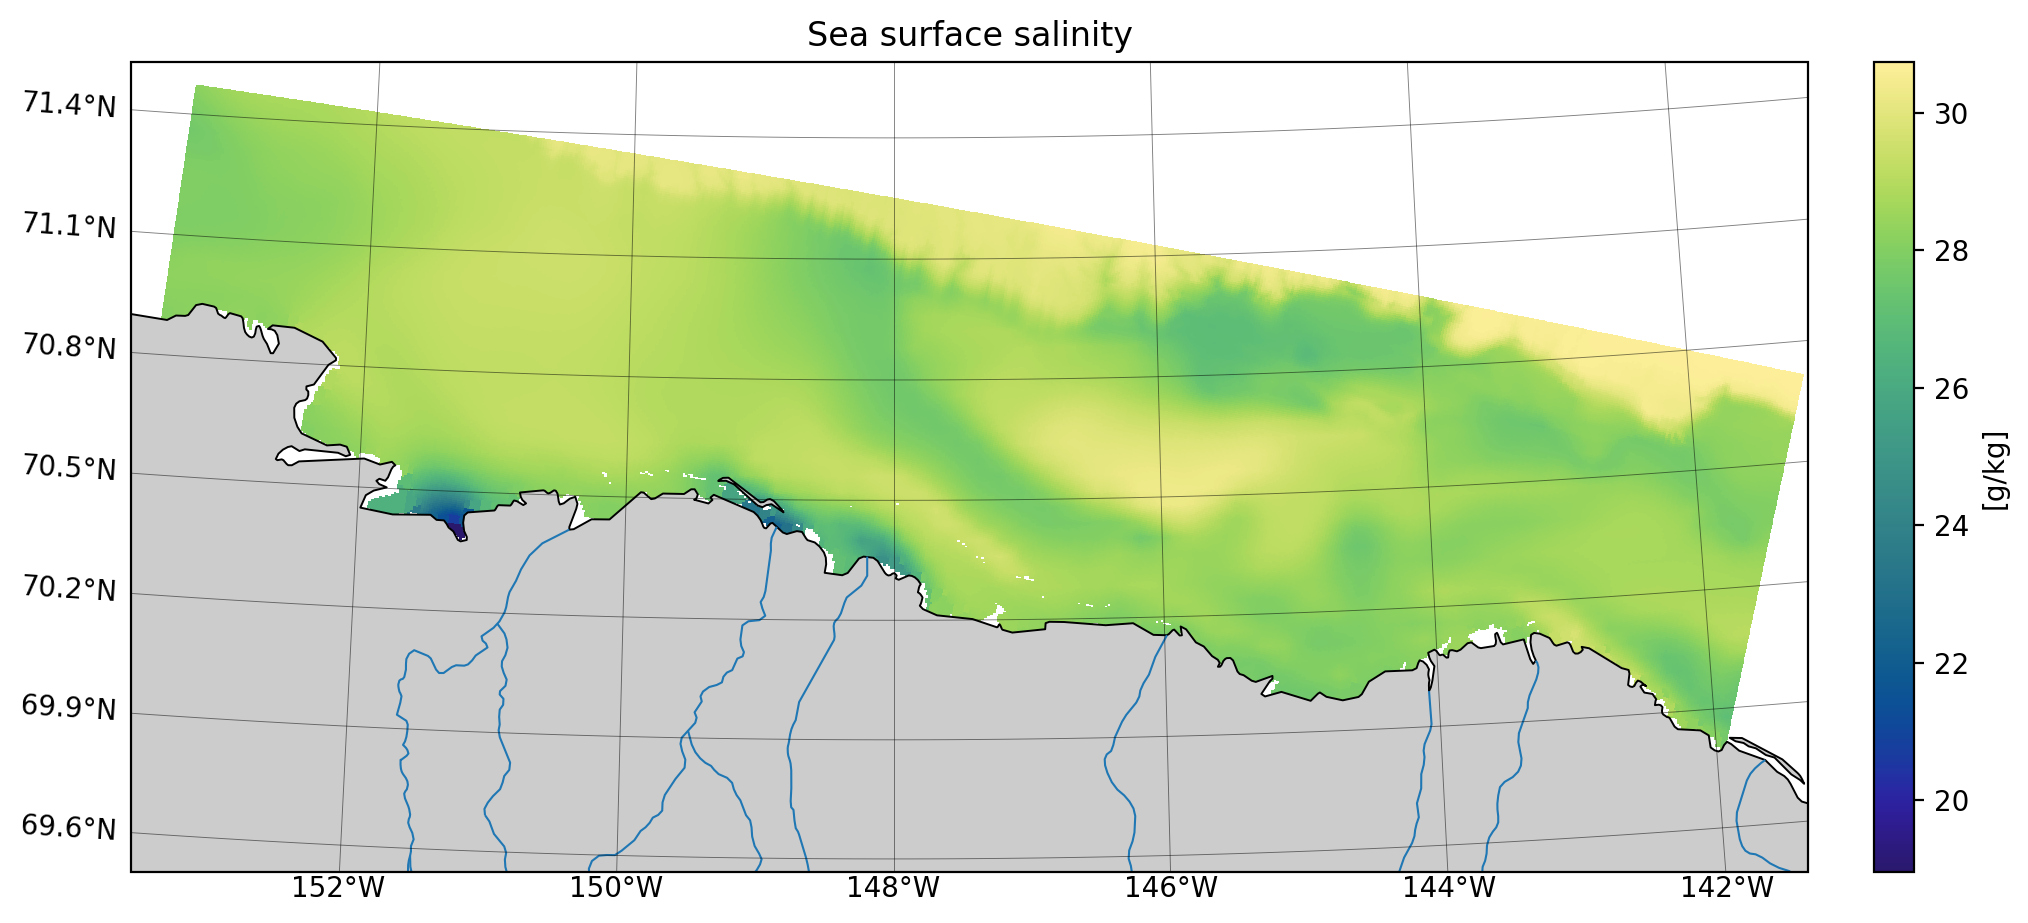

In [3]:
crs = ccrs.LambertConformal(
    central_longitude=-148,
    central_latitude=70.5,
    standard_parallels=(30, 60)  # usually two standard parallels
)

fig, ax = plt.subplots(1, 1, figsize=(12, 4.5), dpi=200,
                       constrained_layout=True, subplot_kw={'projection': crs})

# Set extent and map features
ax.set_extent([-153.5,-141.4,69.5, 71.5],ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            facecolor='0.8'), linewidth=.7)
ax.coastlines(resolution='10m', linewidth=.7)
ax.add_feature(rivers, linewidth=0.75, edgecolor='tab:blue')
ax.add_feature(cartopy.feature.RIVERS, linewidth=0.75, color='tab:blue')

m = ds.salt[0, -1].plot(
    x='lon_rho', y='lat_rho',
    ax=ax,
    cmap=cmo.haline, transform=ccrs.PlateCarree(),
    add_colorbar=False, facecolor="gray"
)
fig.colorbar(m,ax=ax,label='[g/kg]',pad=0.03)
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True, 
                  x_inline=False, y_inline=False, 
                  linewidth=0.33, color='k',alpha=0.5)
gl.right_labels = gl.top_labels = False
gl.xlocator = ticker.FixedLocator([-152, -150,-148,-146,-144,-142])
gl.xlabel_style = {'rotation': 0, 'ha': 'center'}

ax.set_title('Sea surface salinity')

fig.canvas.draw()